#                                                   Algoritmos de Agrupamiento


In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import dist
import mpl_toolkits.mplot3d

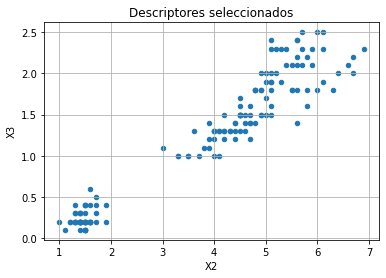

In [304]:
iris = pd.read_excel("Datos IRIS.xlsx", index_col=None, header=None)
iris.plot(2, 3, kind="scatter", xlabel="X2", ylabel="X3")
plt.title('Descriptores seleccionados')
plt.grid()
plt.show()

## División de los datos

In [305]:
# División de dataset

df_T = iris.iloc[0:35] # Datos de Entrenamiento
df_T = df_T.append(iris.iloc[50:85])
df_T = df_T.append(iris.iloc[100:135])

#print("Entrenamiento \n", df_T)


df_P = iris.iloc[35:50]          #Datos de prueba
df_P = df_P.append(iris.iloc[85:100])
df_P = df_P.append(iris.iloc[135:150])

#print("Prueba \n", df_P)

## Normalización de los conjuntos de datos

In [306]:
#Mínimos y máximos
def minimo(dfin):
    min_0 = dfin[0].min()  #Columna 0
    min_1 = dfin[1].min()  #Columna 1
    min_2 = dfin[2].min()  #Columna 2
    min_3 = dfin[3].min()  #Columna 3

    return [min_0, min_1, min_2, min_3]

def maximo(dfin):
    max_0 = dfin[0].max()  #Columna 0
    max_1 = dfin[1].max()  #Columna 1
    max_2 = dfin[2].max()  #Columna 2
    max_3 = dfin[3].max()  #Columna 3

    return [max_0, max_1, max_2, max_3]

# Normalización por columna
def minmax_norm(dfin , min, max):
    return (dfin - min) / (max - min)

# Normalización del dataframe
def norm_df(dfin, min = [0,0,0,0], max = [0,0,0,0]):

    # Normalización de Dataframe de entrenamiento
    df_norm_0 = minmax_norm(dfin[0], min[0], max[0])  #Columna 0
    df_norm_1 = minmax_norm(dfin[1], min[1], max[1])  #Columna 1
    df_norm_2 = minmax_norm(dfin[2], min[2], max[2])  #Columna 2
    df_norm_3 = minmax_norm(dfin[3], min[3], max[3])  #Columna 3

    return pd.DataFrame([df_norm_0,df_norm_1, df_norm_2, df_norm_3, dfin[5]] ).transpose()  # Dataframe con las columnas normalizadas

#Mínimos y máximos para cada Dataframe
global_min = minimo(df_T)    # Mínimo global de los datos
global_max = maximo(df_T)    # Máximo global de los datos

minimo_P = minimo(df_P)
maximo_P = maximo(df_P)


#Actualización de mínimo y máximo global en caso de que sea necesario
for i in range(len(minimo_P)):
    if minimo_P[i] < global_min[i]:
        global_min[i] = minimo_P[i]
    if maximo_P[i] > global_max[i]:
        global_max[i] = maximo_P[i]

#print(global_min, global_max)

#Normalización Dataframe de entrenamiento
# Normalización de Dataframe de validación
df_norm_0 = minmax_norm(df_T[0], global_min[0], global_max[0])  #Columna 0
df_norm_1 = minmax_norm(df_T[1], global_min[1], global_max[1])  #Columna 1
df_norm_2 = minmax_norm(df_T[2], global_min[2], global_max[2])  #Columna 2
df_norm_3 = minmax_norm(df_T[3], global_min[3], global_max[3])  #Columna 3

df_TN = pd.DataFrame([df_norm_0,df_norm_1, df_norm_2, df_norm_3]).transpose()  # Dataframe con las columnas normalizadas

#print("Entrenamiento Normalizado \n", df_TN)

#Normalización Dataframe de prueba
df_PN = norm_df(df_P, global_min, global_max)
#print("Prueba Normalizado \n",df_PN)

In [307]:
# Calcular Error
etiquetas = df_T.iloc[:, -1].values
etiquetas_prueba = df_P.iloc[:, -1].values


def error(output, labels):
    count_error = 0      #contador de errores
    total_data = len(output)  #Total de datos

    for i in range(len(output)):
        if output[i] != labels[i]:
            count_error += 1
    
    percentage = count_error * 100/total_data           # Porcentaje de error
    percentage = round(percentage, 2)

    return percentage

## Para 3 clusters

C:\Users\pipe-\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 2 2
 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1]


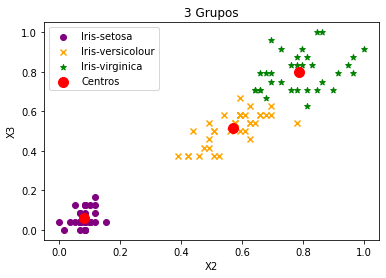

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2]
Error de entrenamiento 5.71


In [308]:
#Datos de entrenamiento normalizados con los dos descriptores seleccionados
x = df_TN.iloc[:, [2, 3]].values

centros = np.array([[0.1, 0.1], [0.3, 0.5], [0.6, 0.6]]) #Matriz que contiene las coordenadas de los centros

kmeans = KMeans(n_clusters = 3, init = centros, max_iter = 300, random_state = 0)     #Entrenamiento para hallar los centros
y_kmeans = kmeans.fit_predict(x)      #Obtener la clasificación de los datos de entrenamiento
print(y_kmeans)                       # Se muestra la clasificación resultante de los datos de entrenamiento


fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c='green', marker='*', label = 'Iris-virginica')

# Visualización de los centroides de cada grupo
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("3 Grupos")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in y_kmeans:
    if i == 0:
        salida.append(1)
    elif i == 1:
        salida.append(2)
    else:
        salida.append(3)

print(salida)

print("Error de entrenamiento", error(salida, etiquetas))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


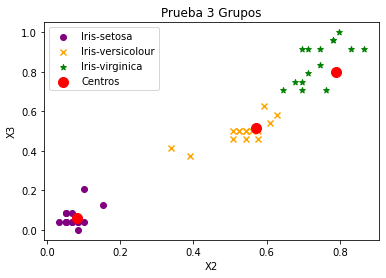

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
0.0


In [309]:
###############     Prueba   ################

#Datos de prueba normalizadoscon los dos descriptores seleccionados
prueba = df_PN.iloc[:, [2, 3]].values

r_kmeans = kmeans.predict(prueba)    #Clasificación de los datos de prueba en base a los centros obtenidos
print(r_kmeans)                      #Se muestra el resultado de la clasificación

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(prueba[r_kmeans == 0, 0], prueba[r_kmeans == 0, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(prueba[r_kmeans == 1, 0], prueba[r_kmeans == 1, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(prueba[r_kmeans == 2, 0], prueba[r_kmeans == 2, 1], c='green', marker='*', label = 'Iris-virginica')

# Visualización de los centroides de cada grupo
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("Prueba 3 Grupos")
ax1.legend()

plt.show()


#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_kmeans:
    if i == 0:
        salida.append(1)
    elif i == 1:
        salida.append(2)
    else:
        salida.append(3)

print(salida)

print(error(salida, etiquetas_prueba))


# Para 4 clusters

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 1 2 2 2 1 2 1 1 2 1 2 1 2 2 1 2 1 2 1 2 2 1 2 2 2 2 1 1 1 1 2 2 3 3 3 3
 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 2 2 3 2 3 3 3 2 2]


C:\Users\pipe-\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


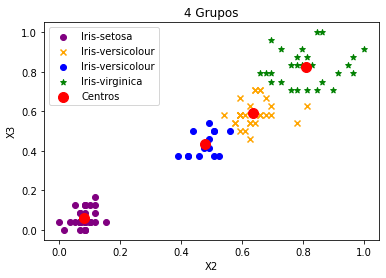

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2]
Error Entrenamiento: 7.62 %


In [310]:
#Datos de entrenamiento normalizados con los dos descriptores seleccionados
x = df_TN.iloc[:, [2, 3]].values

centros = np.array([[0.1, 0.1], [0.2, 0.4], [0.6, 0.6], [0.8, 0.7]]) #Matriz que contiene las coordenadas de los centros

kmeans = KMeans(n_clusters = 4, init = centros , max_iter = 300, n_init = 10, random_state = 0) #Entrenamiento para hallar los centros
y_kmeans = kmeans.fit_predict(x)       #Obtener la clasificación de los datos de entrenamiento
print(y_kmeans)                        # Se muestra la clasificación resultante de los datos de entrenamiento


fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c='blue', marker='o', label = 'Iris-versicolour')
ax1.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], c='green', marker='*', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("4 Grupos")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in y_kmeans:
    if i == 0:
        salida.append(1)
    elif i == 2 or i == 1:
        salida.append(2)
    else:
        salida.append(3)

print(salida)
print("Error Entrenamiento:",error(salida, etiquetas), "%")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 3 3 3 2 3 3 3
 3 3 3 3 3 3 3 2]


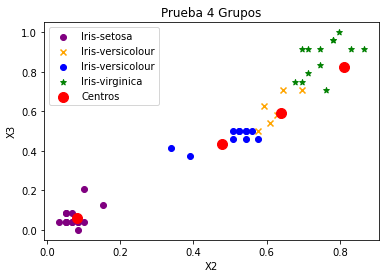

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2]
4.44


In [311]:
###############     Prueba   ################

#Datos de prueba normalizadoscon los dos descriptores seleccionados
prueba = df_PN.iloc[:, [2, 3]].values

r_kmeans = kmeans.predict(prueba)    #Clasificación de los datos de prueba en base a los centros obtenidos
print(r_kmeans)                      #Se muestra el resultado de la clasificación

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(prueba[r_kmeans == 0, 0], prueba[r_kmeans == 0, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(prueba[r_kmeans == 2, 0], prueba[r_kmeans == 2, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(prueba[r_kmeans == 1, 0], prueba[r_kmeans == 1, 1], c='blue', marker='o', label = 'Iris-versicolour')
ax1.scatter(prueba[r_kmeans == 3, 0], prueba[r_kmeans == 3, 1], c='green', marker='*', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("Prueba 4 Grupos")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_kmeans:
    if i == 0:
        salida.append(1)
    elif i == 2 or i == 1:
        salida.append(2)
    else:
        salida.append(3)

print(salida)
print(error(salida, etiquetas_prueba))


# Para 5 clusters

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3
 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 3 2 3 3 3 3 3 3 3 2 2 2 2 3 3 1 4 4 4
 4 1 3 4 4 1 4 4 4 4 4 4 4 1 1 3 4 4 1 3 4 4 3 3 4 4 4 1 4 3 3]


C:\Users\pipe-\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


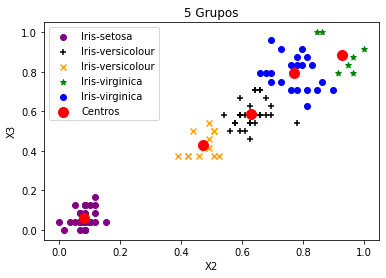

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2]
Error de entrenamiento: 6.67


In [312]:
#Datos de entrenamiento normalizados con los dos descriptores seleccionados
x = df_TN.iloc[:, [2, 3]].values

centros = np.array([[0.1, 0.1], [0.2, 0.2], [0.4, 0.4], [0.6,0.6], [0.8,0.8]]) #Matriz que contiene las coordenadas de los centros

kmeans = KMeans(n_clusters = 5, init = centros, max_iter = 300, n_init = 10, random_state = 0)  #Entrenamiento para hallar los centros
y_kmeans = kmeans.fit_predict(x)            #Obtener la clasificación de los datos de entrenamiento
print(y_kmeans)                             # Se muestra la clasificación resultante de los datos de entrenamiento


fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], c='black', marker='+', label = 'Iris-versicolour')
ax1.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c='green', marker='*', label = 'Iris-virginica')
ax1.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], c='blue', marker='o', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("5 Grupos")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in y_kmeans:
    if i == 0 : 
        salida.append(1)
    elif i == 3 or i == 2:
        salida.append(2)
    else:
        salida.append(3)

print(salida)
print("Error de entrenamiento:",error(salida, etiquetas))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 2 2 3 2 2 2 2 2 3 2 2 1 4 4 3 4 4 4
 4 1 1 4 4 4 4 4]


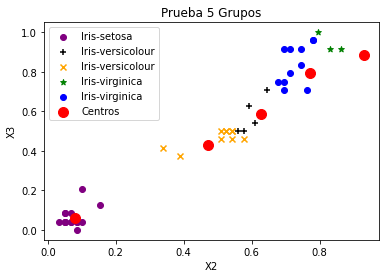

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
2.22


In [313]:
###############     Prueba   ################

#Datos de prueba normalizadoscon los dos descriptores seleccionados
prueba = df_PN.iloc[:, [2, 3]].values

r_kmeans = kmeans.predict(prueba)       #Clasificación de los datos de prueba en base a los centros obtenidos
print(r_kmeans)                         #Se muestra el resultado de la clasificación

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(prueba[r_kmeans == 0, 0], prueba[r_kmeans == 0, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(prueba[r_kmeans == 3, 0], prueba[r_kmeans == 3, 1], c='black', marker='+', label = 'Iris-versicolour')
ax1.scatter(prueba[r_kmeans == 2, 0], prueba[r_kmeans == 2, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(prueba[r_kmeans == 1, 0], prueba[r_kmeans == 1, 1], c='green', marker='*', label = 'Iris-virginica')
ax1.scatter(prueba[r_kmeans == 4, 0], prueba[r_kmeans == 4, 1], c='blue', marker='o', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("Prueba 5 Grupos")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_kmeans:
    if i == 0 : 
        salida.append(1)
    elif i == 3 or i == 2:
        salida.append(2)
    else:
        salida.append(3)

print(salida)

print(error(salida, etiquetas_prueba))


# Para 6 clusters

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3
 3 2 3 3 3 2 3 2 2 3 2 3 2 3 3 2 3 2 4 2 3 3 3 3 3 4 3 2 2 2 2 4 3 5 4 5 4
 5 1 3 1 4 5 4 4 5 4 5 5 4 1 1 3 5 4 1 4 5 1 4 4 5 4 1 1 5 3 3]


C:\Users\pipe-\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


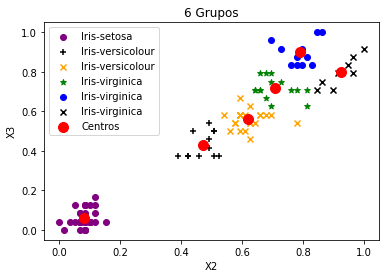

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2]
Error de entrenamiento 6.67


In [314]:
#Datos de entrenamiento normalizados con los dos descriptores seleccionados
x = df_TN.iloc[:, [2, 3]].values

centros = np.array([[0.1, 0.1],[0.2, 0.2], [0.3, 0.4], [0.5, 0.5], [0.7, 0.7], [0.8, 0.9]]) #Matriz que contiene las coordenadas de los centros

kmeans = KMeans(n_clusters = 6, init = centros, max_iter = 300, n_init = 10, random_state = 0)    #Entrenamiento para hallar los centros
y_kmeans = kmeans.fit_predict(x)             #Obtener la clasificación de los datos de entrenamiento
print(y_kmeans)                              # Se muestra la clasificación resultante de los datos de entrenamiento


fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c='black', marker='+', label = 'Iris-versicolour')
ax1.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], c='green', marker='*', label = 'Iris-virginica')
ax1.scatter(x[y_kmeans == 5, 0], x[y_kmeans == 5, 1], c='blue', marker='o', label = 'Iris-virginica')
ax1.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c='black', marker='x', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("6 Grupos")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in y_kmeans:
    if i == 0: 
        salida.append(1)
    elif i == 2 or i == 3:
        salida.append(2)
    else:
        salida.append(3)

print(salida)
print("Error de entrenamiento",error(salida, etiquetas))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 2 2 2 3 2 2 3 2 3 3 2 2 5 5 4 4 5 5 5
 4 5 5 5 4 4 5 4]


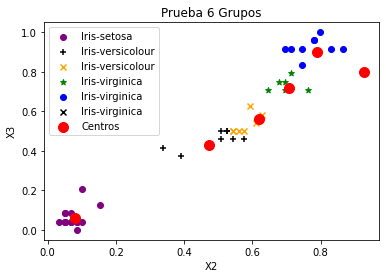

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
0.0


In [336]:
###############     Prueba   ################

#Datos de prueba normalizadoscon los dos descriptores seleccionados
prueba = df_PN.iloc[:, [2, 3]].values

r_kmeans = kmeans.predict(prueba)      #Clasificación de los datos de prueba en base a los centros obtenidos
print(r_kmeans)                        #Se muestra el resultado de la clasificación

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(prueba[r_kmeans == 0, 0], prueba[r_kmeans == 0, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(prueba[r_kmeans == 2, 0], prueba[r_kmeans == 2, 1], c='black', marker='+', label = 'Iris-versicolour')
ax1.scatter(prueba[r_kmeans == 3, 0], prueba[r_kmeans == 3, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(prueba[r_kmeans == 4, 0], prueba[r_kmeans == 4, 1], c='green', marker='*', label = 'Iris-virginica')
ax1.scatter(prueba[r_kmeans == 5, 0], prueba[r_kmeans == 5, 1], c='blue', marker='o', label = 'Iris-virginica')
ax1.scatter(prueba[r_kmeans == 1, 0], prueba[r_kmeans == 1, 1], c='black', marker='x', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("Prueba 6 Grupos")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_kmeans:
    if i == 0: 
        salida.append(1)
    elif i == 2 or i == 3:
        salida.append(2)
    else:
        salida.append(3)

print(salida)

print(error(salida, etiquetas_prueba))




# Punto 2

In [316]:
from fcmeans import FCM

# Para 3 clusters

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2]


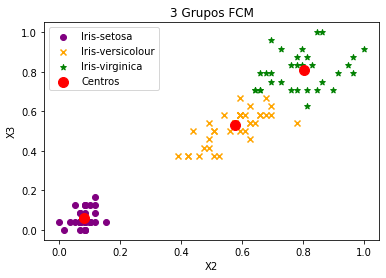

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2]
Error de entrenamiento 4.76
[[100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [ 98.   1.   1.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [ 99.   0.   1.]
 [100.   0.   0.]
 [100.   0.   0.]
 [ 99.   0.   1.]
 [ 98.   1.   1.]
 [ 99.   0.   0.]
 [ 99.   0.   1.]
 [ 98.   1.   1.]
 [100.   0.   0.]
 [ 99.   0.   0.]
 [100.   0.   0.]
 [ 99.   0.   0.]
 [ 99.   0.   1.]
 [ 98.   1.   1.]
 [ 95.   1.   4.]
 [ 98.   1.   1.]
 [100.   0.   0.]
 [ 98.   0.   1.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [ 99.   0.   1.]
 [ 99.   0.   1.]
 [100.   0.   0.]
 [ 99.   0.   1.]
 [  0.   2.  97.]
 [  1.  

In [327]:
#Datos de entrenamiento normalizados con los dos descriptores seleccionados
x = df_TN.iloc[:, [ 2, 3]].values


fcmean = FCM(n_clusters=3,m = 2.0, n_init=10, random_state=0)  #Parámetros para el algoritmo
y_fcmeans = fcmean.fit(x)               #Entrenamiento para hallar los centros
r_fcmeans = fcmean.predict(x)           #Obtener la clasificación de los datos de entrenamiento

print(r_fcmeans)                        # Se muestra la clasificación resultante de los datos de entrenamiento

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(x[r_fcmeans == 0, 0], x[r_fcmeans == 0, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(x[r_fcmeans == 2, 0], x[r_fcmeans == 2, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(x[r_fcmeans == 1, 0], x[r_fcmeans == 1, 1], c='green', marker='*', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(fcmean.centers[:, 0], fcmean.centers[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("3 Grupos FCM")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_fcmeans:
    if i == 0:
        salida.append(1)
    elif i == 2:
        salida.append(2)
    else:
        salida.append(3)

print(salida)

print("Error de entrenamiento", error(salida, etiquetas))

pert_fcmeans = fcmean.soft_predict(x)
print(np.round(pert_fcmeans * 100), 2)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


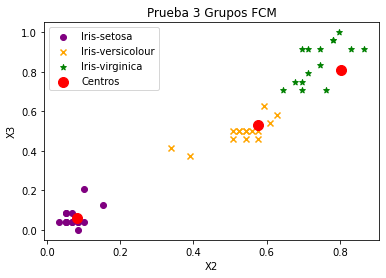

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
0.0
[[ 99.   0.   0.]
 [100.   0.   0.]
 [ 99.   0.   1.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [ 91.   2.   6.]
 [ 96.   1.   3.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [100.   0.   0.]
 [  1.  10.  88.]
 [  1.   6.  93.]
 [  0.   1.  99.]
 [  1.   2.  97.]
 [  1.   3.  96.]
 [  1.   3.  96.]
 [  0.   1.  99.]
 [  3.   4.  93.]
 [ 21.  11.  68.]
 [  1.   1.  98.]
 [  2.   3.  95.]
 [  1.   1.  98.]
 [  0.   1.  99.]
 [ 23.  12.  65.]
 [  1.   2.  97.]
 [  1.  93.   6.]
 [  2.  89.   9.]
 [  1.  84.  15.]
 [  2.  49.  49.]
 [  0.  97.   3.]
 [  2.  89.   9.]
 [  2.  86.  12.]
 [  1.  79.  20.]
 [  1.  94.   5.]
 [  2.  86.  12.]
 [  2.  88.  10.]
 [  2.  74.  24.]
 [  1.  90.   9.]
 [  1.  91.   7.]
 [  2.  66.  32.]] 2


In [328]:
###############     Prueba   ################

#Datos de prueba normalizadoscon los dos descriptores seleccionados
prueba = df_PN.iloc[:, [2, 3]].values

r_fcmeans = fcmean.predict(prueba)  #Clasificación de los datos de prueba en base a los centros obtenidos
print(r_fcmeans)                    #Se muestra el resultado de la clasificación

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(prueba[r_fcmeans == 0, 0], prueba[r_fcmeans == 0, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(prueba[r_fcmeans == 2, 0], prueba[r_fcmeans == 2, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(prueba[r_fcmeans == 1, 0], prueba[r_fcmeans == 1, 1], c='green', marker='*', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(fcmean.centers[:, 0], fcmean.centers[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("Prueba 3 Grupos FCM")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_fcmeans:
    if i == 0:
        salida.append(1)
    elif i == 2:
        salida.append(2)
    else:
        salida.append(3)

print(salida)

print(error(salida, etiquetas_prueba))

# Matriz de grados de pertenecia
pert_fcmeans = fcmean.soft_predict(prueba)
print(np.round(pert_fcmeans * 100), 2)

# Para 4 Clusters

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 3 1 3 1 3 1 3 3 1 3 1 3 1 1 3 1 3 1 3 1 3 3 1 1 1 1 3 3 3 3 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


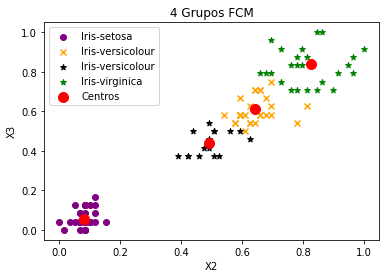

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2]
Error de entrenamiento 8.57
[[  0.   0. 100.   0.]
 [  0.   0. 100.   0.]
 [  0.   0.  99.   0.]
 [  0.   0. 100.   0.]
 [  0.   0. 100.   0.]
 [  1.   1.  96.   2.]
 [  0.   0. 100.   0.]
 [  0.   0. 100.   0.]
 [  0.   0. 100.   0.]
 [  0.   0.  98.   1.]
 [  0.   0. 100.   0.]
 [  0.   0. 100.   0.]
 [  0.   0.  98.   1.]
 [  1.   1.  97.   2.]
 [  0.   0.  99.   1.]
 [  0.   1.  97.   2.]
 [  0.   1.  97.   2.]
 [  0.   0. 100.   0.]
 [  0.   0.  99.   1.]
 [  0.   0. 100.   0.]
 [  0.   0.  99.   1.]
 [  0.   1.  97.   2.]
 [  1.   1.  97.   2.]
 [  1.   3.  91.   6.]
 [  0.   1.  97.   2.]
 [  0.   0. 100.   0.]
 [  0.   1.  97.   2.]
 [  0.   0. 100.   0.]
 [  0.   0. 

In [329]:
#Datos de entrenamiento normalizados con los dos descriptores seleccionados
x = df_TN.iloc[:, [2, 3]].values

fcmean = FCM(n_clusters=4,m = 2.0, n_init=10, random_state=0)      #Parámetros para el algoritmo 
y_fcmeans = fcmean.fit(x)               #Entrenamiento para hallar los centros
r_fcmeans = fcmean.predict(x)           #Obtener la clasificación de los datos de entrenamiento

print(r_fcmeans)                # Se muestra la clasificación resultante de los datos de entrenamiento

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(x[r_fcmeans == 2, 0], x[r_fcmeans == 2, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(x[r_fcmeans == 1, 0], x[r_fcmeans == 1, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(x[r_fcmeans == 3, 0], x[r_fcmeans == 3, 1], c='black', marker='*', label = 'Iris-versicolour')
ax1.scatter(x[r_fcmeans == 0, 0], x[r_fcmeans == 0, 1], c='green', marker='*', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(fcmean.centers[:, 0], fcmean.centers[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("4 Grupos FCM")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_fcmeans:
    if i == 2:
        salida.append(1)
    elif i == 1 or i == 3:
        salida.append(2)
    else:
        salida.append(3)

print(salida)
print("Error de entrenamiento", error(salida, etiquetas))

# Matriz de grados de pertenecia
pert_fcmeans = fcmean.soft_predict(x)
print(np.round(pert_fcmeans * 100), 2)


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 3 3 3 1 3 3 3 3 3 3 3 3 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 1]


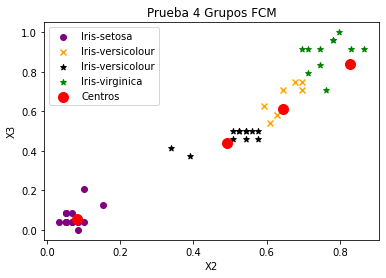

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2]
8.89
[[  0.   0.  99.   1.]
 [  0.   0.  99.   0.]
 [  0.   0.  98.   1.]
 [  0.   0.  99.   0.]
 [  0.   0. 100.   0.]
 [  0.   0.  99.   0.]
 [  0.   0.  99.   0.]
 [  0.   0.  99.   0.]
 [  2.   4.  84.  10.]
 [  1.   2.  93.   4.]
 [  0.   0. 100.   0.]
 [  0.   0. 100.   0.]
 [  0.   0. 100.   0.]
 [  0.   0. 100.   0.]
 [  0.   0. 100.   0.]
 [  3.  91.   0.   6.]
 [  1.  97.   0.   2.]
 [  4.  38.   1.  57.]
 [  2.  15.   1.  82.]
 [  2.  11.   1.  86.]
 [  3.  21.   1.  75.]
 [  3.  78.   1.  18.]
 [  0.   2.   0.  98.]
 [  3.  10.   6.  81.]
 [  2.  22.   1.  75.]
 [  1.   8.   1.  90.]
 [  2.  22.   1.  75.]
 [  3.  29.   1.  66.]
 [  4.  13.   9.  74.]
 [  2.  15.   1.  82.]
 [ 93.   5.   1.   2.]
 [ 85.  10.   1.   4.]
 [ 49.  43.   1.   7.]
 [ 15.  76.   1.   8.]
 [ 88.   9.   1.   3.]
 [ 85.  10.   1.   4.]
 [ 74.  18.   2.   6.]
 [ 43.  

In [330]:
###############     Prueba   ################

#Datos de prueba normalizadoscon los dos descriptores seleccionados
prueba = df_PN.iloc[:, [2, 3]].values

r_fcmeans = fcmean.predict(prueba)      #Clasificación de los datos de prueba en base a los centros obtenidos
print(r_fcmeans)                        #Se muestra el resultado de la clasificación

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(prueba[r_fcmeans == 2, 0], prueba[r_fcmeans == 2, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(prueba[r_fcmeans == 1, 0], prueba[r_fcmeans == 1, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(prueba[r_fcmeans == 3, 0], prueba[r_fcmeans == 3, 1], c='black', marker='*', label = 'Iris-versicolour')
ax1.scatter(prueba[r_fcmeans == 0, 0], prueba[r_fcmeans == 0, 1], c='green', marker='*', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(fcmean.centers[:, 0], fcmean.centers[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("Prueba 4 Grupos FCM")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_fcmeans:
    if i == 2:
        salida.append(1)
    elif i == 1 or i == 3:
        salida.append(2)
    else:
        salida.append(3)

print(salida)

print(error(salida, etiquetas_prueba))

# Matriz de grados de pertenecia
pert_fcmeans = fcmean.soft_predict(prueba)
print(np.round(pert_fcmeans * 100), 2)

# Para 5 clusters

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4
 4 2 4 4 4 2 4 4 2 4 2 4 2 4 4 2 4 2 0 2 4 4 4 4 4 0 4 2 2 2 2 4 4 1 0 1 0
 1 1 4 1 0 1 0 0 1 0 1 1 0 1 1 4 1 0 1 0 1 0 0 0 1 0 1 1 1 4 4]


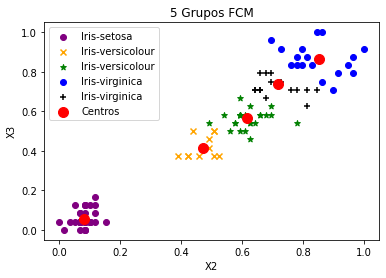

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2]
Error de entrenamiento 5.71
[[  0.   0.   0. 100.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   0.  99.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   0. 100.   0.]
 [  1.   1.   3.  95.   1.]
 [  0.   0.   0.  99.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   1.  98.   1.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   0.  99.   0.]
 [  0.   0.   1.  98.   1.]
 [  1.   0.   2.  96.   1.]
 [  0.   0.   1.  98.   0.]
 [  1.   0.   2.  96.   1.]
 [  1.   0.   2.  96.   1.]
 [  0.   0.   0.  99.   0.]
 [  0.   0.   1.  98.   0.]
 [  0.   0.   0.  99.   0.]
 [  0.   0.   1.  99.   0.]
 [  1.   0.   2.  96.   1.]
 [  1.   0.   2.  96.   1.]
 [  2.   1. 

In [331]:
#Datos de entrenamiento normalizados con los dos descriptores seleccionados
x = df_TN.iloc[:, [ 2, 3]].values

fcmean = FCM(n_clusters=5, m = 2.0, n_init=10, random_state=0)      #Parámetros para el algoritmo 
y_fcmeans = fcmean.fit(x)               #Entrenamiento para hallar los centros
r_fcmeans = fcmean.predict(x)           #Obtener la clasificación de los datos de entrenamiento

print(r_fcmeans)                        # Se muestra la clasificación resultante de los datos de entrenamiento

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(x[r_fcmeans == 3, 0], x[r_fcmeans == 3, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(x[r_fcmeans == 2, 0], x[r_fcmeans == 2, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(x[r_fcmeans == 4, 0], x[r_fcmeans == 4, 1], c='green', marker='*', label = 'Iris-versicolour')
ax1.scatter(x[r_fcmeans == 1, 0], x[r_fcmeans == 1, 1], c='blue', marker='o', label = 'Iris-virginica')
ax1.scatter(x[r_fcmeans == 0, 0], x[r_fcmeans == 0, 1], c='black', marker='+', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(fcmean.centers[:, 0], fcmean.centers[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("5 Grupos FCM")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_fcmeans:
    if  i == 3: 
        salida.append(1)
    elif i == 2 or i == 4:
        salida.append(2)
    else:
        salida.append(3)

print(salida)
print("Error de entrenamiento", error(salida, etiquetas))

# Matriz de grados de pertenecia
pert_fcmeans = fcmean.soft_predict(x)
print(np.round(pert_fcmeans * 100), 2)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 2 2 2 4 2 2 4 2 4 4 2 2 1 1 0 0 0 1 1
 0 1 1 1 0 0 1 0]


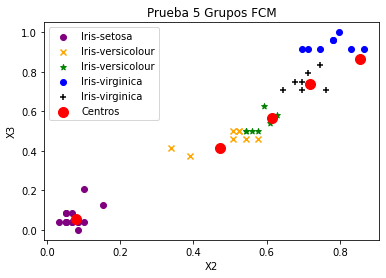

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
0.0
[[  0.   0.   1.  98.   0.]
 [  0.   0.   0.  99.   0.]
 [  0.   0.   1.  98.   1.]
 [  0.   0.   0.  99.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   1.  99.   0.]
 [  0.   0.   1.  99.   0.]
 [  0.   0.   0.  99.   0.]
 [  3.   2.  10.  80.   5.]
 [  1.   1.   5.  91.   2.]
 [  0.   0.   0.  99.   0.]
 [  0.   0.   0.  99.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   0. 100.   0.]
 [ 11.   2.   5.   1.  81.]
 [  1.   0.   1.   0.  98.]
 [  5.   2.  24.   1.  68.]
 [  5.   2.  52.   1.  40.]
 [  5.   2.  61.   1.  31.]
 [  6.   2.  47.   1.  43.]
 [  1.   0.   2.   0.  96.]
 [  2.   1.  85.   1.  11.]
 [  3.   2.  83.   4.   8.]
 [  6.   2.  42.   1.  50.]
 [  4.   2.  68.   1.  26.]
 [  6.   2.  42.   1.  50.]
 [  6.   2.  32.   1.  59.]
 [  5.   3.  72.   7.  13.]
 [  5.   2.  52.   1.  40.]
 [  5.  92.   1.   0

In [333]:
###############     Prueba   ################

#Datos de prueba normalizadoscon los dos descriptores seleccionados
prueba = df_PN.iloc[:, [2, 3]].values

r_fcmeans = fcmean.predict(prueba)          #Clasificación de los datos de prueba en base a los centros obtenidos
print(r_fcmeans)                            #Se muestra el resultado de la clasificación

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización delos grupos
ax1.scatter(prueba[r_fcmeans == 3, 0], prueba[r_fcmeans == 3, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(prueba[r_fcmeans == 2, 0], prueba[r_fcmeans == 2, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(prueba[r_fcmeans == 4, 0], prueba[r_fcmeans == 4, 1], c='green', marker='*', label = 'Iris-versicolour')
ax1.scatter(prueba[r_fcmeans == 1, 0], prueba[r_fcmeans == 1, 1], c='blue', marker='o', label = 'Iris-virginica')
ax1.scatter(prueba[r_fcmeans == 0, 0], prueba[r_fcmeans == 0, 1], c='black', marker='+', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(fcmean.centers[:, 0], fcmean.centers[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("Prueba 5 Grupos FCM")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_fcmeans:
    if  i == 3: 
        salida.append(1)
    elif i == 2 or i == 4:
        salida.append(2)
    else:
        salida.append(3)

print(salida)

print(error(salida, etiquetas_prueba))

# Matriz de grados de pertenecia
pert_fcmeans = fcmean.soft_predict(prueba)
print(np.round(pert_fcmeans * 100), 2)

# Para 6 clusters

[0 0 0 0 0 5 5 0 0 0 0 0 0 0 0 5 5 5 5 5 0 5 0 5 0 0 5 0 0 0 0 5 0 0 0 1 1
 1 3 1 1 1 3 1 3 3 1 3 1 3 1 1 3 1 3 2 3 1 1 1 1 1 2 1 3 3 3 3 1 1 4 2 4 2
 4 4 1 4 2 4 2 2 4 2 4 4 2 4 4 1 4 2 4 2 4 2 2 2 4 2 4 4 4 1 1]


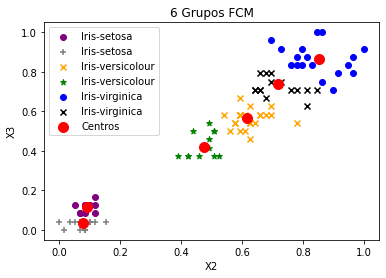

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2]
Error de entrenamiento 5.71
[[ 98.   0.   0.   0.   0.   2.]
 [ 98.   0.   0.   0.   0.   2.]
 [ 90.   0.   0.   0.   0.   9.]
 [ 98.   0.   0.   0.   0.   2.]
 [ 98.   0.   0.   0.   0.   2.]
 [  8.   0.   0.   0.   0.  91.]
 [ 39.   0.   0.   0.   0.  60.]
 [ 98.   0.   0.   0.   0.   2.]
 [ 98.   0.   0.   0.   0.   2.]
 [ 91.   0.   0.   0.   0.   9.]
 [ 98.   0.   0.   0.   0.   2.]
 [ 89.   0.   0.   0.   0.  10.]
 [ 91.   0.   0.   0.   0.   9.]
 [ 78.   1.   0.   1.   0.  20.]
 [ 81.   0.   0.   0.   0.  18.]
 [  2.   0.   0.   0.   0.  98.]
 [ 16.   0.   0.   1.   0.  83.]
 [ 39.   0.   0.   0.   0.  60.]
 [ 30.   0.   0.   1.   0.  68.]
 [ 31.   0.   0.   0.   0.  6

In [334]:
#Datos de entrenamiento normalizados con los dos descriptores seleccionados
x = df_TN.iloc[:, [ 2, 3]].values

fcmean = FCM(n_clusters=6, m = 2.0, n_init=10, random_state=0)      #Parámetros para el algoritmo 
y_fcmeans = fcmean.fit(x)                                           #Entrenamiento para hallar los centros
r_fcmeans = fcmean.predict(x)                                       #Obtener la clasificación de los datos de entrenamiento

print(r_fcmeans)                                    # Se muestra la clasificación resultante de los datos de entrenamiento

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización de los grupos
ax1.scatter(x[r_fcmeans == 5, 0], x[r_fcmeans == 5, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(x[r_fcmeans == 0, 0], x[r_fcmeans == 0, 1], c='gray', marker='+', label = 'Iris-setosa')
ax1.scatter(x[r_fcmeans == 1, 0], x[r_fcmeans == 1, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(x[r_fcmeans == 3, 0], x[r_fcmeans == 3, 1], c='green', marker='*', label = 'Iris-versicolour')
ax1.scatter(x[r_fcmeans == 4, 0], x[r_fcmeans == 4, 1], c='blue', marker='o', label = 'Iris-virginica')
ax1.scatter(x[r_fcmeans == 2, 0], x[r_fcmeans == 2, 1], c='black', marker='x', label = 'Iris-virginica')


# Visualización de los centros de cada grupo
ax1.scatter(fcmean.centers[:, 0], fcmean.centers[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("6 Grupos FCM")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_fcmeans:
    if i == 5 or i == 0: 
        salida.append(1)
    elif i == 1 or i == 3:
        salida.append(2)
    else:
        salida.append(3)

print(salida)
print("Error de entrenamiento", error(salida, etiquetas))

# Matriz de grados de pertenecia
pert_fcmeans = fcmean.soft_predict(x)
print(np.round(pert_fcmeans * 100), 2)

[0 0 0 0 0 5 5 0 5 5 5 0 0 0 0 1 1 1 3 3 3 1 3 3 1 3 1 1 3 3 4 4 2 2 2 4 4
 2 4 4 4 2 2 4 2]


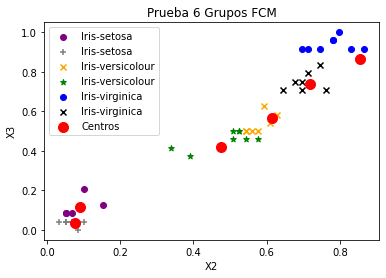

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
0.0
[[81.  0.  0.  0.  0. 18.]
 [90.  0.  0.  0.  0.  9.]
 [91.  0.  0.  0.  0.  9.]
 [90.  0.  0.  0.  0.  9.]
 [98.  0.  0.  0.  0.  2.]
 [46.  0.  0.  0.  0. 53.]
 [46.  0.  0.  0.  0. 53.]
 [90.  0.  0.  0.  0.  9.]
 [21.  2.  1.  3.  1. 73.]
 [21.  1.  0.  2.  0. 76.]
 [39.  0.  0.  0.  0. 60.]
 [89.  0.  0.  0.  0. 10.]
 [98.  0.  0.  0.  0.  2.]
 [98.  0.  0.  0.  0.  2.]
 [98.  0.  0.  0.  0.  2.]
 [ 0. 80. 11.  5.  2.  1.]
 [ 0. 98.  1.  1.  0.  0.]
 [ 1. 67.  5. 24.  2.  1.]
 [ 1. 38.  5. 52.  2.  1.]
 [ 1. 30.  5. 61.  2.  1.]
 [ 1. 42.  6. 47.  2.  2.]
 [ 0. 96.  1.  2.  0.  0.]
 [ 1. 10.  2. 86.  1.  1.]
 [ 3.  8.  3. 79.  2.  5.]
 [ 1. 48.  5. 42.  2.  1.]
 [ 1. 24.  4. 68.  2.  1.]
 [ 1. 48.  5. 42.  2.  1.]
 [ 1. 58.  6. 32.  2.  1.]
 [ 6. 12.  5. 66.  3.  8.]
 [ 1. 38.  5. 52.  2.  1.]
 [ 0.  2.  5.  1. 92.  0.]
 [ 1.  6. 19.  3. 71.  

In [335]:
###############     Prueba   ################

#Datos de prueba normalizadoscon los dos descriptores seleccionados
prueba = df_PN.iloc[:, [2, 3]].values

r_fcmeans = fcmean.predict(prueba)          #Clasificación de los datos de prueba en base a los centros obtenidos
print(r_fcmeans)                            #Se muestra el resultado de la clasificación

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Visualización de los grupos
ax1.scatter(prueba[r_fcmeans == 5, 0], prueba[r_fcmeans == 5, 1], c='purple', marker='o', label = 'Iris-setosa')
ax1.scatter(prueba[r_fcmeans == 0, 0], prueba[r_fcmeans == 0, 1], c='gray', marker='+', label = 'Iris-setosa')
ax1.scatter(prueba[r_fcmeans == 1, 0], prueba[r_fcmeans == 1, 1], c='orange', marker='x', label = 'Iris-versicolour')
ax1.scatter(prueba[r_fcmeans == 3, 0], prueba[r_fcmeans == 3, 1], c='green', marker='*', label = 'Iris-versicolour')
ax1.scatter(prueba[r_fcmeans == 4, 0], prueba[r_fcmeans == 4, 1], c='blue', marker='o', label = 'Iris-virginica')
ax1.scatter(prueba[r_fcmeans == 2, 0], prueba[r_fcmeans == 2, 1], c='black', marker='x', label = 'Iris-virginica')

# Visualización de los centros de cada grupo
ax1.scatter(fcmean.centers[:, 0], fcmean.centers[:, 1], s = 100, c = 'red', label = 'Centros')
ax1.set_xlabel('X2')
ax1.set_ylabel('X3')
ax1.set_title("Prueba 6 Grupos FCM")
ax1.legend()

plt.show()

#Interpretación de la clasificación (El algoritmo le asigna en orden diferente)
salida = []
for i in r_fcmeans:
    if i == 5 or i == 0: 
        salida.append(1)
    elif i == 1 or i == 3:
        salida.append(2)
    else:
        salida.append(3)

print(salida)

print(error(salida, etiquetas_prueba))

# Matriz de grados de pertenecia
pert_fcmeans = fcmean.soft_predict(prueba)
print(np.round(pert_fcmeans * 100), 2)